Import Statements

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

Get the past 10 years of stock price close data for Proctor & Gamble

In [2]:
ticker = 'AAPL' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

Estimate historical log returns

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,AAPL
Date,
2020-08-05,0.003618
2020-08-06,0.034294
2020-08-07,-0.022998
2020-08-10,0.014430
2020-08-11,-0.017766


Plot PG's price

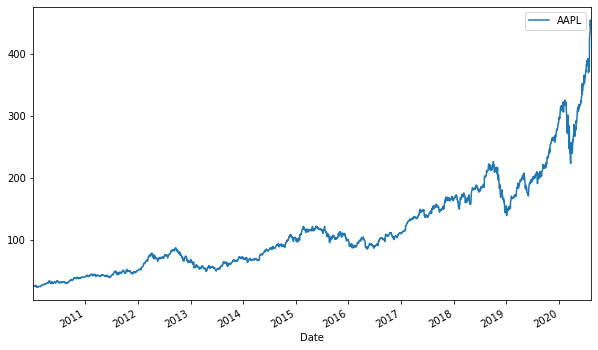

In [4]:
data.plot(figsize=(10, 6));

Plot log returns

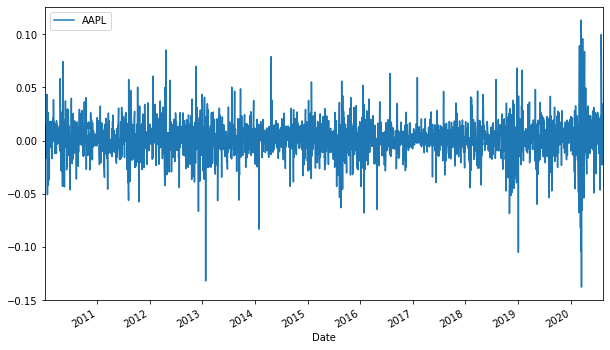

In [5]:
log_returns.plot(figsize = (10, 6))

find the mean

In [6]:
u = log_returns.mean()
u

AAPL    0.001056
dtype: float64

find the variance

In [7]:
var = log_returns.var()
var

AAPL    0.000307
dtype: float64

calculate the drift component for our geometric brownian motion model, mean - 1/2 variance

In [8]:
drift = u - (0.5 * var)
drift

AAPL    0.000903
dtype: float64

stddev of returns

In [9]:
stdev = log_returns.std()
stdev

AAPL    0.017535
dtype: float64

check that the types of our variables are pandas series

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

convert pandas to np arrays

In [12]:
np.array(drift)

array([0.00090262])

In [13]:
drift.values

array([0.00090262])

works with stddev too

In [14]:
stdev.values

array([0.01753466])

function to find standard deviation of percent chance, for instance 95% chance (lower tail probability) is 1.65 standard deviations above the mean

In [15]:
norm.ppf(0.95)

1.6448536269514722

10x2 array of random numbers

In [16]:
x = np.random.rand(10, 2)
x

array([[0.92673812, 0.5494405 ],
       [0.94463016, 0.44360967],
       [0.92378562, 0.85467921],
       [0.96403073, 0.67444319],
       [0.43131598, 0.7918462 ],
       [0.46553224, 0.53604408],
       [0.27243973, 0.53391839],
       [0.53004359, 0.86346642],
       [0.38272884, 0.67487288],
       [0.28535242, 0.87659657]])

pass the random numbers into the ppf function

In [17]:
norm.ppf(x)

array([[ 1.45192034,  0.12424789],
       [ 1.59487725, -0.14182361],
       [ 1.4310051 ,  1.05671522],
       [ 1.79950687,  0.45221567],
       [-0.17302478,  0.81284383],
       [-0.08650564,  0.09047239],
       [-0.60545087,  0.08512348],
       [ 0.07537944,  1.09602653],
       [-0.29832166,  0.45340903],
       [-0.56701374,  1.15814013]])

call this a random variable denoted $Z$

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.31275607, -0.34221977],
       [-0.21089266, -0.30935868],
       [ 0.94214765, -1.37763537],
       [-2.57294088,  0.48345882],
       [ 1.4875049 , -0.16358593],
       [ 0.57191123, -0.91231754],
       [-0.88064359, -0.49196388],
       [ 0.29215231,  1.16128334],
       [-0.47995331,  2.17654561],
       [ 0.57680426, -1.29980013]])

variables for the simulation

`t_intervals` is the number of days in the future

`iterations` is the number of times to simulate

In [19]:
t_intervals = 38
iterations = 1000000

matrix of daily returns = $e^{\text{drift} + \text{stddev} \cdot Z}$

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.97297753, 1.00294879, 1.00569701, ..., 0.99754596, 1.00310334,
        1.01020251],
       [0.98416077, 0.99868504, 1.0062479 , ..., 0.98551077, 1.00974572,
        1.0145871 ],
       [0.96372402, 0.99176213, 1.00091767, ..., 1.02249993, 0.97756891,
        0.98271711],
       ...,
       [0.98830915, 1.00302893, 1.00890945, ..., 1.00550572, 0.96758243,
        0.95269505],
       [0.97950078, 0.96718497, 0.99052832, ..., 0.99105964, 0.97902515,
        1.00953374],
       [1.0339717 , 0.99277055, 0.99742339, ..., 0.99676384, 1.01555512,
        0.99519109]])

Each row represents a day, each column represents a simulation. The values are the daily returns for that day and simulation. $S_{t+1} = S_{t-1} \cdot r$. We set $S_0$ equal to the current stock price.

In [21]:
S0 = data.iloc[-1]
S0

AAPL    442.970001
Name: 2020-08-11 00:00:00, dtype: float64

create a new array with the same dimentions as `daily returns`

In [22]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

set the first row (first day) of the simulation equal to the current price

In [23]:
price_list[0] = S0
price_list

array([[442.97000122, 442.97000122, 442.97000122, ..., 442.97000122,
        442.97000122, 442.97000122],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

simulate each day

In [24]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

did it work?

In [25]:
price_list

array([[442.97000122, 442.97000122, 442.97000122, ..., 442.97000122,
        442.97000122, 442.97000122],
       [435.95369786, 442.38751164, 445.73763413, ..., 436.55170794,
        447.28706179, 449.43165043],
       [420.13904888, 438.74318003, 446.14667266, ..., 446.37408868,
        437.25392387, 441.66417224],
       ...,
       [412.44213326, 518.63755018, 442.839626  , ..., 492.93855256,
        473.62841209, 416.70786575],
       [403.98738985, 501.61844396, 438.64519054, ..., 488.53150687,
        463.69412491, 420.68064978],
       [417.71152906, 497.9920175 , 437.51497152, ..., 486.95054099,
        470.9069417 , 418.65763416]])

plot the iterations if there aren't too many

In [26]:
if iterations <= 10000:
    plt.figure(figsize=(10,6))
    plt.plot(price_list);

the final prices after `t_intervals` days for each iteration

In [27]:
final_prices = price_list[-1]
final_prices

array([417.71152906, 497.9920175 , 437.51497152, ..., 486.95054099,
       470.9069417 , 418.65763416])

a histogram of the prices after `t_intervals` days

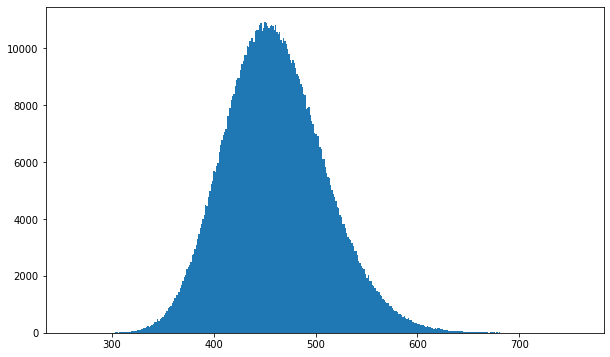

In [28]:
plt.figure(figsize=(10,6))
plt.hist(final_prices, bins='auto');

calculate the cumulative probability that the stock will be between two values

In [103]:
lb = 420
lb_inclusive = True
ub = -1
ub_inclusive = False

total_prices = 0
counted = 0
for price in final_prices:
    lb_condition = lb == -1 or price > lb
    ub_condition = ub == -1 or price < ub
    if lb_condition and ub_condition:
        counted += 1
    elif lb_inclusive and price == lb:
        counted += 1
    elif ub_inclusive and price == ub:
        counted += 1
    total_prices += 1

counted / total_prices

0.791431

class to represent a bundle of option contracts with a function to calculate the p/l at a given price

In [30]:
class OptionsStrategy:
    def __init__(self, contracts):
        self.contracts = contracts
        
    def reward(self, mkt):
        credit = -0.02

        for contract in self.contracts:
            if contract[0] == "LONG":
                credit -= contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit += mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit += contract[3] - mkt
            elif contract[0] == "SHORT":
                credit += contract[2]
                if contract[1] == "CALL" and mkt > contract[3]:
                    credit -= mkt - contract[3]
                elif contract[1] == "PUT" and mkt < contract[3]:
                    credit -= contract[3] - mkt

        return credit

test a strategy

In [104]:
# ("LONG", "CALL", premium, strike)

trial_strategy = OptionsStrategy([
    ("SHORT", "PUT", 12.80, 420),
    ("LONG", "PUT", 11.20, 415)
])

plot the profit/loss diagram and breakeven point

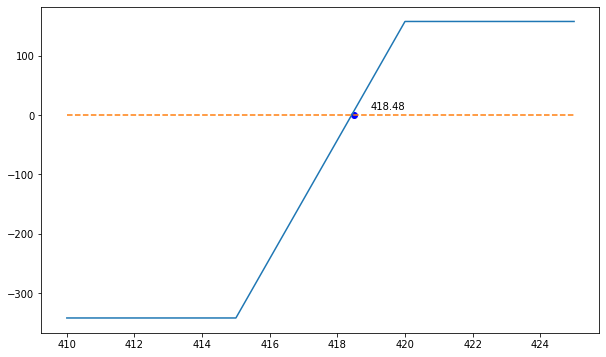

In [107]:
plt.figure(figsize=(10,6))
x = np.linspace(410, 425, 100)
breakeven_pl = 100
breakeven_price = 0
y = []
for xi in x:
    reward_i = trial_strategy.reward(xi) * 100
    y.append(reward_i)
    if abs(reward_i) < breakeven_pl:
        breakeven_price = xi
        breakeven_pl = abs(reward_i)
plt.annotate("{:.2f}".format(breakeven_price), (breakeven_price + 0.5, 10))
plt.plot(breakeven_price, 0, 'bo')
plt.plot(x, y);
plt.plot(x, [0]*len(x), '--');

calculate ev of the strategy

In [108]:
granularity = len(final_prices)

ev = 0
max_risk = 0
prob_success = 0
for price in final_prices:
    reward = trial_strategy.reward(price) * 100
    ev += reward / granularity
    if reward > 0:
        prob_success += 1
    if -1 * reward > max_risk:
        max_risk = -1 * reward
    
ev

61.54802933575211

capital risked

In [109]:
max_risk

342.00000000000017

expected return on capital risked

In [110]:
ev / max_risk

0.17996499805775462

probability of success

In [111]:
prob_success / granularity

0.801536